# Principal Component Analysis

In [24]:
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Algorithm Psuedocode:

1. Standardize the d-dimensional dataset.
2. Construct the covariance matrix.
3. Decompose the covariance matrix into its eigenvectors and eigenvalues.
4. Sort the eigenvalues by decreasing order to rank the corresponding eigenvectors.
5. Select k eigenvectors which correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace (k ≤ d).
6. Construct a projection matrix W from the “top” k eigenvectors.
7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.


In [25]:
class PCA:
    def __init__(self, n_components):
        self.n_components_ = n_components
        self.components = None
        self.eign_vals = None
        self.eign_vectors = None
    
    def fit(self, X):
        cov_mat = np.cov(X.T)
        eigen_vals, eigen_vectors = scipy.linalg.eigh(cov_mat)
        
        eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vectors[:, i]) 
                       for i in range(len(eigen_vals))]
        eigen_pairs.sort(key=lambda k: k[0], reverse=True)
        
        
        sorted_values = []
        sorted_vectors = []
        
        for i, j in eigen_pairs:
            sorted_values.append(i)
            sorted_vectors.append(j)
    
    
        self.eign_vals = sorted_values
        self.eign_vectors = sorted_vectors
        self.components = sorted_vectors[: self.n_components_]
    
    def transform(self, X):
        return np.matmul(self.components,
                         X.T).T

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(-X)

    
    @property
    def explained_variance_ratio(self):
        return self.eign_vals/np.sum(self.eign_vals)
    
    @property
    def explained_variance_ratio_cumsum(self):
        return np.cumsum(self.explained_variance_ratio)
    
    @classmethod
    def plot_variance_ratio_curve(cls, X):
        _, n_features = X.shape
        
        obj_ = PCA(n_components=n_features)
        obj_.fit(X)
        
        plt.bar(range(1, obj_.n_components_ + 1),
                obj_.explained_variance_ratio,
                align='center', 
                color= 'black',
                label='individual explained variance')
        
        plt.step(range(1, obj_.n_components_ + 1),
                 obj_.explained_variance_ratio_cumsum,
                 where='mid',
                 label='cumulative explained variance',
                 color='r')
        
        plt.title('PCA Explained variance ratio')
        plt.ylabel('Ratio')
        plt.xlabel('Principal component index')
        plt.legend(loc='best')
        plt.show()


In [26]:
X = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df1=X[(X["DISTRICT"]=='TOTAL')|( X["DISTRICT"]=="DELHI UT TOTAL")]
X=df1.drop(['DISTRICT','CUSTODIAL RAPE','OTHER RAPE'],axis=1)
X.drop(X.iloc[:,10:], axis = 1, inplace = True,index=None) 
X.to_csv('cluster.csv',index=None)
X

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING and ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY
28,ANDHRA PRADESH,2001,2602,1555,136,871,1182,765,417,214
42,ARUNACHAL PRADESH,2001,83,53,3,33,83,55,28,22
70,ASSAM,2001,1356,481,40,817,1480,1070,410,532
115,BIHAR,2001,3643,3419,250,888,2159,518,1641,1291
135,CHHATTISGARH,2001,880,529,45,959,207,171,36,87
...,...,...,...,...,...,...,...,...,...,...
8990,D & N HAVELI,2012,7,2,0,3,13,9,4,2
8993,DAMAN & DIU,2012,3,5,0,5,3,0,3,1
8997,DELHI UT,2012,521,439,82,706,3970,2160,1810,28
9013,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0


In [27]:
all_headers = X.columns
all_headers
cols_to_norm = all_headers[2:-1]
print (cols_to_norm)

Index(['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
       'KIDNAPPING and ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS'],
      dtype='object')


In [28]:
X[cols_to_norm] = StandardScaler().fit_transform(X[cols_to_norm])
X

,STATE/UT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,KIDNAPPING and ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY
28,ANDHRA PRADESH,2001,1.355806,0.624391,0.117431,0.434526,0.273298,0.141587,0.572318,214
42,ARUNACHAL PRADESH,2001,-0.722163,-0.683682,-0.407091,-0.772706,-0.630457,-0.594066,-0.565354,22
70,ASSAM,2001,0.327958,-0.310942,-0.261172,0.356733,0.518356,0.457607,0.551846,532
115,BIHAR,2001,2.214546,2.247726,0.567021,0.459016,1.076727,-0.114337,4.152037,1291
135,CHHATTISGARH,2001,-0.064703,-0.269140,-0.241453,0.561300,-0.528486,-0.473875,-0.541958,87
...,...,...,...,...,...,...,...,...,...,...
8990,D & N HAVELI,2012,-0.784856,-0.728097,-0.418923,-0.815924,-0.688021,-0.641728,-0.635545,2
8993,DAMAN & DIU,2012,-0.788156,-0.725485,-0.418923,-0.813043,-0.696244,-0.651053,-0.638470,1
8997,DELHI UT,2012,-0.360849,-0.347519,-0.095533,0.196825,2.565990,1.586991,4.646296,28
9013,LAKSHADWEEP,2012,-0.790631,-0.729839,-0.418923,-0.820246,-0.698711,-0.651053,-0.647243,0


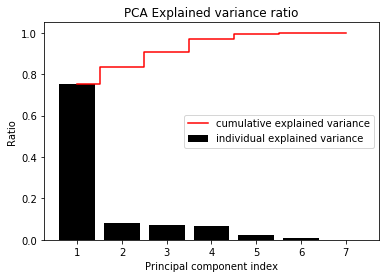

In [29]:
PCA.plot_variance_ratio_curve(X[cols_to_norm].to_numpy())

In [30]:
pca = PCA(2)
pca.fit_transform(X[cols_to_norm].to_numpy())

array([[ 1.35585348e+00,  4.71989672e-01],
       [-1.65252599e+00, -2.66440971e-01],
       [ 6.17945169e-01, -1.01674552e-01],
       [ 4.02631863e+00, -1.70874600e-01],
       [-6.26356442e-01,  8.72257035e-01],
       [-1.75390425e+00, -2.50460456e-01],
       [-1.08883860e-01, -3.54254930e-01],
       [-6.48346088e-01,  4.60318395e-03],
       [-1.55151613e+00, -1.85782908e-01],
       [-2.85188715e-01, -4.31627204e-02],
       [-9.45332165e-02,  3.41187736e-01],
       [ 1.00427198e-01,  1.13181558e-01],
       [-8.14754299e-01,  3.03612474e-01],
       [ 2.42795039e+00,  3.03656441e+00],
       [ 1.38284958e+00,  1.14061647e+00],
       [-1.56276560e+00, -2.46019880e-01],
       [-1.64245118e+00, -2.48449834e-01],
       [-1.74834322e+00, -2.05211156e-01],
       [-1.70175597e+00, -2.48519914e-01],
       [-1.76980763e-01,  6.01144023e-01],
       [-5.23954682e-01, -1.12259897e-01],
       [ 2.23253065e+00, -4.27086318e-01],
       [-1.76692548e+00, -2.62006936e-01],
       [ 6.

In [31]:
2

2